In [21]:
import numpy as np
import msicpe.san as san
from plotly import express as px
import scipy.signal as signal
from matplotlib import pyplot as plt
import math

# 2.1 Lecture des fichiers et affichages
1. Les signaux des différentes bases sont fournis au format .npz. Voici le code permettant de lire ce format et
d’importer les signaux en tant que variable Python.
2. Affichez le signal chargé en fonction du temps.
3. Grâce à la fonction san.trans_fourier(), calculez la transformée de Fourier du signal et affichez le spectre
en fonction des fréquences réelles (en Hz). Expliquer la présence des différents pics observés.
4. Tracer maintenant le logarithme (base 10) du spectre et commenter les différences avec le tracé précédent.

In [22]:
dat = np.load('data_partie_2/etude/signal_3.npz')
s = dat['s']
t = dat['t']
# supprimer la composante continue
Moyenne = np.mean(s)
print(Moyenne)
s = s - Moyenne


0.00089483894


question2 : Affichez le signal chargé en fonction du temps

In [23]:
fig1 = px.line(x=t, y=s, title='Signal 3 fonction du temps', labels={'x':'Temps', 'y':'Amplitude'}).show()

3. Grâce à la fonction san.trans_fourier(), calculez la transformée de Fourier du signal et affichez le spectre
en fonction des fréquences réelles (en Hz). Expliquer la présence des différents pics observés

In [24]:
nu, S = san.trans_fourier(s,t)
log10 = np.log(abs(S)) 
norm = log10/max(log10)
fig1 = px.line(x=nu, y=abs(S), title='TF de signal 3 fonction de nu', labels={'x':'nu', 'y':'TF(Fx(t))'}).show()

4. Tracer maintenant le logarithme (base 10) du spectre et commenter les différences avec le tracé précédent.

In [25]:
fig1 = px.line(x=nu, y=norm, title='log10 de la Transformée de Fourier du signal 3', labels={'x':'nu', 'y':'log10(TF(Fx(t)))'}).show()


# 2.2 Apprentissage − Caractérisation des voyelles
Dans cette section, votre objectif est de définir un vecteur contenant un certain nombre de valeurs caractéristiques de
chaque voyelle de la base d’apprentissage. Plus précisément, ce vecteur contiendra les amplitudes moyennes des spectres
de la voyelle d’intérêt aux fréquences suivantes :

- à la fréquence fondamentale
- aux fréquences d’un certain nombre d’harmoniques (à vous de déterminer le nombre d’harmoniques à considérer)
Pour extraire les amplitudes du spectre à ces fréquences, vous avez à votre disposition les fonctions suivantes :
- san.detect_fondamentale()
- san.detect_pics()

1. Choisir une voyelle et un nombre d’harmoniques (appelé H, qui sera amené à être modifié par la suite). Pour cha-
cun des 5 sons de la voyelle choisie, construire un vecteur de dimension (H +1) contenant les valeurs d’amplitude
du logarithme (base 10) du spectre aux fréquences d’intérêt

In [26]:
def trace(liste,H):
    for i in liste:
        dat = np.load('data_partie_2/apprentissage/{}_2.npz'.format(i))
        s = dat['s']
        t = dat['t']
        Moyenne = np.mean(s)
        s = s - Moyenne
        nu, S = san.trans_fourier(s,t)
        log10 = np.log(abs(S)) 
        norm = log10/max(log10) # permet au spectre d'avoir pour valeur max 1
        fondamentale = san.detect_fondamentale(abs(S), nu, 200)
        liste_freq = [i * fondamentale for i in range(1,H+1)]
        print(fondamentale)
        FreqHarmoniques, AmpliHarmoniques = san.detect_pics(norm, liste_freq, nu)
        print(FreqHarmoniques)
        print(AmpliHarmoniques)
        fig1 = px.line(x=nu, y=norm, title='Transformée de Fourier de la voyelle {} en log10, normalisée'.format(i), labels={'x':'nu', 'y':'amplitude normalisée'}).show()

trace(['a','e','i','o','u'], 15)

113.96200316666666
[ 113.981       227.962       342.94283333  457.92366667  571.90466667
  685.88566667  799.86666667  912.84783333 1026.82883333 1137.81033333
 1251.79133333 1365.77233333 1478.7535     1586.7355     1704.71583333]
[1.         0.96055835 0.75604576 0.8562182  0.7428267  0.9133772
 0.8957543  0.8048955  0.6771915  0.7106995  0.838546   0.64920783
 0.4404845  0.34471914 0.24994268]


118.96033663888889
[ 118.98016667  238.96016667  355.94066667  474.92083333  594.90083333
  713.881       833.861       950.8415     1070.8215     1189.80166667
 1288.78516667 1416.76383333 1531.74466667 1652.7245     1768.70516667]
[0.91918427 0.9168517  0.78131443 1.         0.7154919  0.47105384
 0.53324103 0.51070225 0.39976293 0.5551309  0.668595   0.35147083
 0.20786303 0.15766124 0.20055635]


126.95767019444445
[ 126.97883333  254.9575      381.93633333  509.915       636.89383333
  762.87283333  888.85183333 1011.83133333 1139.81       1268.7885
 1394.7675     1512.74783333 1647.72533333 1772.7045     1899.68333333]
[ 0.93896544  1.          0.6648008   0.47249705  0.2508564   0.20209338
  0.11388082 -0.00676924 -0.14018814 -0.1712636  -0.24061742 -0.22026822
 -0.20184384 -0.23643287 -0.12397058]


120.95967002777779
[ 120.97983333  240.95983333  361.93966667  482.9195      603.89933333
  718.88016667  838.86016667  963.83933333 1088.8185     1201.79966667
 1316.7805     1435.76066667 1560.73983333 1682.7195     1800.69983333]
[0.89910185 1.         0.989648   0.81781584 0.65976304 0.54586494
 0.27857444 0.23228627 0.1575418  0.14098145 0.08156249 0.0698835
 0.04142278 0.05872713 0.03181924]


140.95300391666666
[ 140.9765      281.953       419.93        562.90616667  706.88216667
  842.8595      977.837      1117.81366667 1268.7885     1405.76566667
 1539.74333333 1686.71883333 1817.697      1957.67366667 2100.64983333]
[1.         0.9358606  0.6315348  0.41967547 0.3335966  0.30253735
 0.13650586 0.16877103 0.13567096 0.22906737 0.19970806 0.5013003
 0.32549345 0.4179574  0.31915146]


2. Calculez le vecteur contenant la valeur moyenne des spectres (toujours en logarithme) de la voyelle choisie pour
chaque fréquence d’intérêt. Affichez le contenu des 5 vecteurs obtenus en fonction des indices des harmoniques
considérées, ainsi que le vecteur moyen

le son 3 a pour frequences [ 155.974       309.94833333  465.92233333  616.89716667  774.87083333
  930.84483333 1083.81933333 1231.79466667 1396.76716667 1548.74183333
 1704.71583333 1863.68933333 2009.665      2169.63833333 2315.614     ] a pour amplitude [1.         0.8359998  0.42965773 0.3046344  0.23928931 0.19003019
 0.15691416 0.12194708 0.04167849 0.01813786 0.01878519 0.07060263
 0.14491943 0.08666933 0.0504689 ]
u : 510.421
i : 652.786
o : 1108.324
e : 1253.248
a : 1497.919


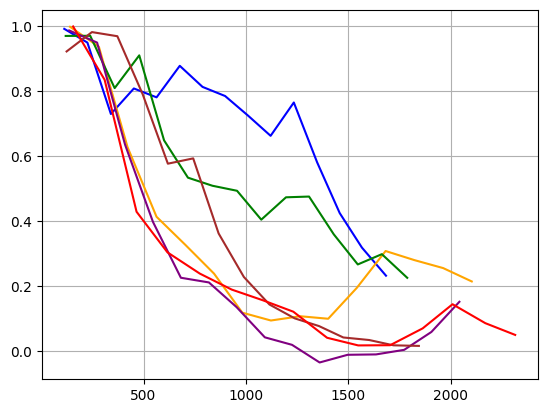

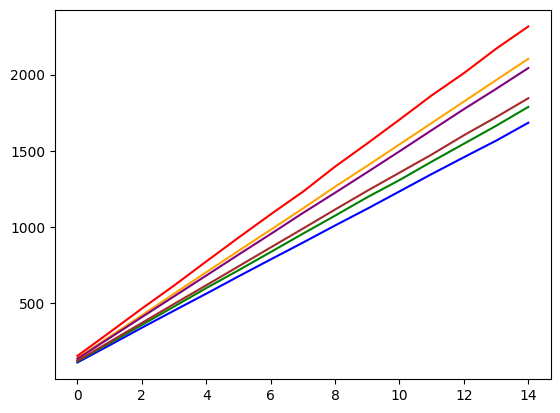

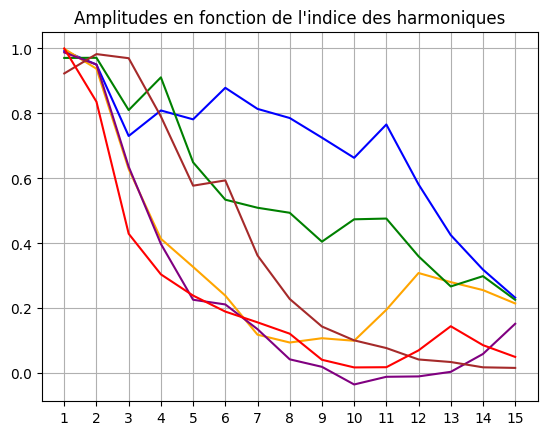

In [ ]:
def distance_euclidienne(a, b):
    return math.sqrt(sum((x - y)**2 for x, y in zip(a, b)))

def Harmoniques(data, H):
    s = data['s']
    t = data['t']
    Moyenne = np.mean(s)
    s = s - Moyenne
    nu, S = san.trans_fourier(s,t)
    logS = np.log10(np.abs(S))
    norm = logS/max(logS)
    fondamentale = san.detect_fondamentale(abs(S), nu, 200)
    liste_freq = [i * fondamentale for i in range(1,H+1)] #retourne une liste de frequences multiples de la fondamentale
    FreqHarmoniques, AmpliHarmoniques = san.detect_pics(norm, liste_freq, nu)
    return FreqHarmoniques, AmpliHarmoniques, fondamentale

def Moyennage(lettre, nb_harmoniques):
    '''cette fonction va nous permettre de faire la moyenne de chaque harmonique pour des signaux similaires. la lettre est un string'''
    freq=[]
    ampli=[]
    for i in range(1,6): #premet de créer une liste de l'emplacement où les sons sont stockés
        fichier = "data_partie_2/apprentissage/{}_{}.npz".format(lettre, i)
        data = np.load(fichier)
        F, A, fondamentale = Harmoniques(data, nb_harmoniques)
        freq.append(F)
        ampli.append(A)
    return (np.mean(freq, axis=0)), (np.mean(ampli, axis=0)), np.mean(fondamentale)

nbH = 15

#son mystere
FreqMystere, AmplMystere, fondM = Harmoniques(np.load("data_partie_2/test/i_7.npz"),nbH)
print("le son 3 a pour frequences",FreqMystere,"a pour amplitude" ,AmplMystere)

MoyFa, MoyAa, fondA = Moyennage('a', nbH)
MoyFe, MoyAe, fondE = Moyennage('e', nbH)
MoyFi, MoyAi, fondI = Moyennage('i', nbH)
MoyFo, MoyAo, fondO = Moyennage('o', nbH)
MoyFu, MoyAu, fondU = Moyennage('u', nbH)

dicoMoyF = {'a': MoyFa, 'e': MoyFe, 'i': MoyFi, 'o': MoyFo, 'u': MoyFu}
dicoMoyA = {'a': MoyAa, 'e': MoyAe, 'i': MoyAi, 'o': MoyAo, 'u': MoyAu}
dicoFond = {'a': round(fondA), 'e': round(fondE), 'i': round(fondI), 'o': round(fondO), 'u': round(fondU)}

#print("les fondamentales sont : ", dicoFond)
#print("les frequences moyennes sont : ", dicoMoyF)

#plot amplitude en fonction de la frequece
plt.plot(MoyFa, MoyAa, 'blue') # bleu
plt.plot(MoyFu, MoyAu, 'orange') #orange
plt.plot(MoyFe, MoyAe, 'green') #vert
plt.plot(MoyFi, MoyAi, 'purple') #violet
plt.plot(MoyFo, MoyAo, 'brown') #marron
plt.plot(FreqMystere,AmplMystere, 'red') #rouge
plt.grid(axis='both')

plt.figure()
plt.plot(MoyFa, 'blue') # bleu
plt.plot(MoyFu, 'orange') #orange
plt.plot(MoyFe, 'green') #vert
plt.plot(MoyFi, 'purple') #violet
plt.plot(MoyFo, 'brown') #marron
plt.plot(FreqMystere, 'red') #rouge

#nouveau graphique
plt.figure()
plt.title("Amplitudes en fonction de l'indice des harmoniques")
plt.grid(axis='both')
plt.xticks(np.arange(nbH), np.arange(1, nbH+1))
plt.plot(MoyAa, 'blue') # bleu
plt.plot(MoyAu, 'orange') #orange
plt.plot(MoyAe, 'green') #vert
plt.plot(MoyAi, 'purple') #violet
plt.plot(MoyAo, 'brown') #marron
plt.plot(AmplMystere, 'red') #rouge

distances = []
for lettre, moyF in dicoMoyF.items():
    d = distance_euclidienne(moyF, FreqMystere)
    distances.append((lettre, d))

distances_triees = sorted(distances, key=lambda x: x[1])

for lettre, d in distances_triees:
    print(f"{lettre} : {d:.3f}")


for i in ['a','e', 'i', 'o', 'u']:
    #print('le son ',i ,' a pour harmoniques', Moyennage(i, nbH)[0], "et pour amplitude", Moyennage(i, nbH)[1])
    #print('FREQUENCES : distance à',i ,' : ', distance_euclidienne(Moyennage(i, nbH)[0], FreqMystere))
    #print('AMPLITUDES : distance à',i ,' : ', 100*distance_euclidienne(Moyennage(i, nbH)[1], AmplMystere))

3. Répétez les opérations précédentes les autres voyelles et affinez le choix de H

# ON PREND LE SIGNAL 3
dans le dossier etude fichier2